In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [4]:
#Split the Dataframes by Decade from 60s, 70s, 80s, 90s, 2000s, 2010s
bb60s = bb100[(bb100['WeekID'] >= '1960-1-1') & (bb100['WeekID'] < '1970-1-1')]
bb70s = bb100[(bb100['WeekID'] >= '1970-1-1') & (bb100['WeekID'] < '1980-1-1')]
bb80s = bb100[(bb100['WeekID'] >= '1980-1-1') & (bb100['WeekID'] < '1990-1-1')]
bb90s = bb100[(bb100['WeekID'] >= '1990-1-1') & (bb100['WeekID'] < '2000-1-1')]
bb2000s = bb100[(bb100['WeekID'] >= '2000-1-1') & (bb100['WeekID'] < '2010-1-1')]
bb2010s = bb100[(bb100['WeekID'] >= '2010-1-1') & (bb100['WeekID'] < '2020-1-1')]

In [5]:
#Add Decade Column to Dataframe:
def decade_to_df(df, decade_as_string):
    return df.assign(Decade=decade_as_string)

In [6]:
#Execute the decade_to_df function on split dataframes:
bb60s = decade_to_df(bb60s, '1960s')
bb70s = decade_to_df(bb70s, '1970s')
bb80s = decade_to_df(bb80s, '1980s')
bb90s = decade_to_df(bb90s, '1990s')
bb2000s = decade_to_df(bb2000s, '2000s')
bb2010s = decade_to_df(bb2010s, '2010s')

In [7]:
#Stack all dataframes on top of each other
bb_all_decade = pd.concat([bb60s, bb70s, bb80s, bb90s, bb2000s, bb2010s])

In [8]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

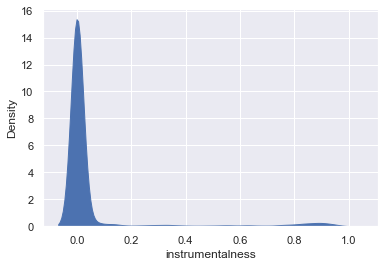

In [17]:
#Merge bb60s with features and check distribution of 'instrumentalness'
bb60s_features = pd.merge(bb60s, features, on='SongID', how='left')
sns.kdeplot(data=bb60s_features, x='instrumentalness', fill=True, alpha=1);

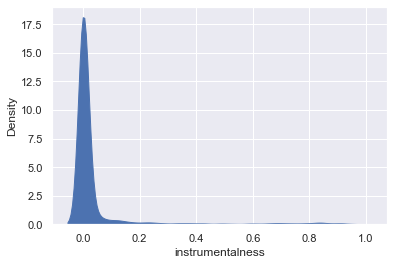

In [18]:
#Merge bb70s with features and check distribution of 'instrumentalness'
bb70s_features = pd.merge(bb70s, features, on='SongID', how='left')
sns.kdeplot(data=bb70s_features, x='instrumentalness', fill=True, alpha=1);

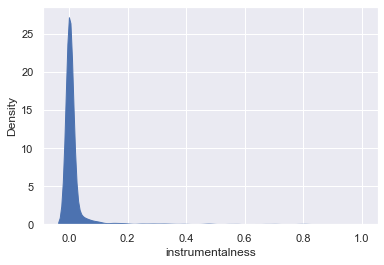

In [19]:
#Merge bb80s with features and check distribution of 'instrumentalness'
bb80s_features = pd.merge(bb80s, features, on='SongID', how='left')
sns.kdeplot(data=bb80s_features, x='instrumentalness', fill=True, alpha=1);

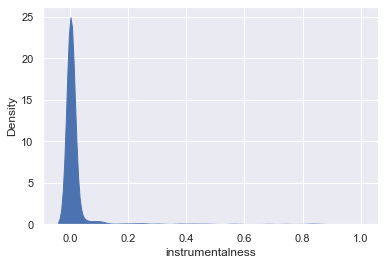

In [20]:
#Merge bb90s with features and check distribution of 'instrumentalness'
bb90s_features = pd.merge(bb90s, features, on='SongID', how='left')
sns.kdeplot(data=bb90s_features, x='instrumentalness', fill=True, alpha=1);

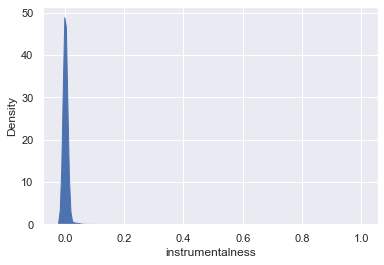

In [21]:
#Merge bb2000s with features and check distribution of 'instrumentalness'
bb2000s_features = pd.merge(bb2000s, features, on='SongID', how='left')
sns.kdeplot(data=bb2000s_features, x='instrumentalness', fill=True, alpha=1);

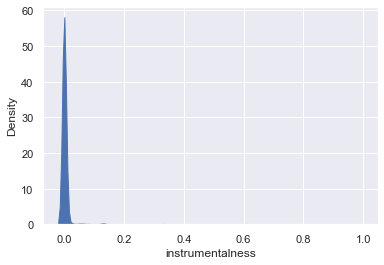

In [22]:
#Merge bb2010s with features and check distribution of 'instrumentalness'
bb2010s_features = pd.merge(bb2010s, features, on='SongID', how='left')
sns.kdeplot(data=bb2010s_features, x='instrumentalness', fill=True, alpha=1);

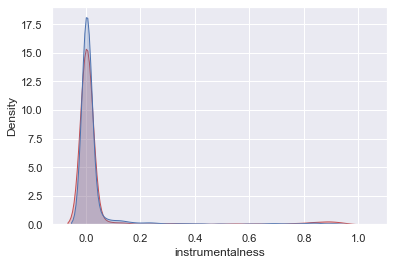

In [30]:
fig = sns.kdeplot(data=bb60s_features, x='instrumentalness', shade=True, color='r')
fig = sns.kdeplot(data=bb70s_features, x='instrumentalness', shade=True, color='b');

In [9]:
bb_all_dec_feat = pd.merge(bb_all_decade, features, on='SongID', how='left')
bb_all_dec_feat.describe()

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
count,315456.000000,315456.000000,285467.000000,315456.000000,315456.000000,2.766190e+05,276619.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276097.000000,276619.000000
mean,50.434102,1.069747,47.617465,41.387395,9.191773,2.308336e+05,0.112816,0.614380,0.634074,5.255776,-8.335211,0.715998,0.071321,0.252920,0.027741,0.185188,0.600173,120.099230,3.951499,47.869337
std,28.871837,0.327853,28.076176,29.534372,7.573105,6.457150e+04,0.316368,0.149584,0.192598,3.565160,3.541917,0.450938,0.078149,0.260286,0.123570,0.154318,0.235445,27.667887,0.273837,21.081375
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.968800e+04,0.000000,0.103000,0.000581,0.000000,-28.030000,0.000000,0.022000,0.000003,0.000000,0.013000,0.034900,35.716000,0.000000,0.000000
25%,25.000000,1.000000,23.000000,14.000000,4.000000,1.919860e+05,0.000000,0.517000,0.496000,2.000000,-10.667000,0.000000,0.032100,0.037400,0.000000,0.087800,0.418000,99.150000,4.000000,33.000000
50%,50.000000,1.000000,47.000000,39.000000,7.000000,2.263330e+05,0.000000,0.622000,0.652000,5.000000,-7.758000,1.000000,0.041300,0.153000,0.000004,0.126000,0.619000,118.714000,4.000000,50.000000
75%,75.000000,1.000000,72.000000,66.000000,13.000000,2.605740e+05,0.000000,0.721000,0.789000,8.000000,-5.582000,1.000000,0.067100,0.411000,0.000380,0.240000,0.796000,135.938000,4.000000,64.000000
max,100.000000,9.000000,100.000000,100.000000,87.000000,3.079157e+06,1.000000,0.988000,0.997000,11.000000,2.291000,1.000000,0.951000,0.991000,0.982000,0.999000,0.991000,241.009000,5.000000,100.000000


In [10]:
bb_all_dec_feat.sort_values(by='instrumentalness', ascending=False).groupby('Decade').mean()

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Decade,,,,,,,,,,,,,,,,,,,,
1960s,50.505485,1.033813,48.051657,46.778322,5.544602,165657.253666,0.000355,0.534563,0.515995,5.135581,-10.380635,0.835894,0.049199,0.524225,0.056394,0.215586,0.667754,119.687649,3.852160,28.389440
1970s,50.500690,1.019023,47.955961,44.973238,7.041475,234634.079562,0.000845,0.578622,0.581086,5.147471,-10.443024,0.756195,0.052244,0.336621,0.046150,0.188122,0.665430,119.353487,3.943839,38.260402
1980s,50.495308,1.010208,46.762318,38.350021,8.464186,256779.202899,0.003020,0.629781,0.649123,5.288762,-9.839070,0.705490,0.046358,0.208785,0.026678,0.177853,0.655414,121.080617,3.976118,43.727549
1990s,50.495652,1.014013,48.005063,38.619349,10.341434,264818.484037,0.097975,0.650911,0.646782,5.424418,-8.549515,0.659814,0.074395,0.176666,0.029460,0.177769,0.576200,117.513200,3.962462,46.263627
2000s,50.500623,1.073160,48.112697,40.145323,11.258405,239768.550181,0.207018,0.632925,0.709780,5.253496,-5.726375,0.674973,0.097080,0.148563,0.007860,0.179232,0.556140,120.086203,3.974753,56.316749
2010s,50.120825,1.259754,46.856782,39.532715,12.364217,220575.610385,0.319800,0.647745,0.679556,5.276235,-5.833401,0.679670,0.100735,0.162962,0.007084,0.176312,0.502580,122.386642,3.985901,68.885148


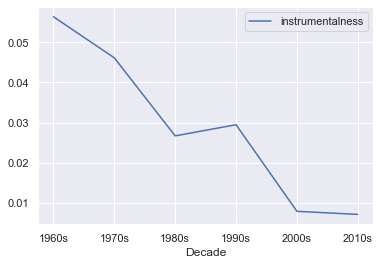

In [11]:
bb_all_dec_feat[['Decade','instrumentalness']].dropna().groupby('Decade').mean().plot();

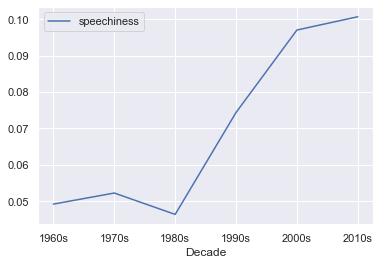

In [12]:
bb_all_dec_feat[['Decade','speechiness']].dropna().groupby('Decade').mean().plot();

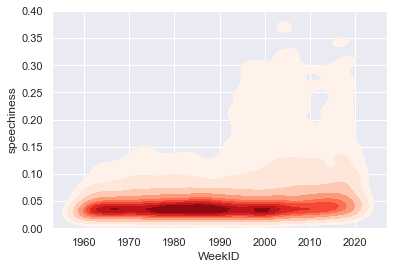

In [85]:
sns.kdeplot(data = bb_all_dec_feat.dropna(), x='WeekID', y='speechiness', cmap='Reds', shade=True)
plt.ylim([0,0.4]);

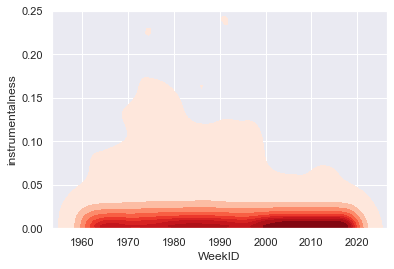

In [86]:
sns.kdeplot(data = bb_all_dec_feat, x='WeekID', y='instrumentalness', cmap='Reds', shade=True)
plt.ylim(0,0.25);

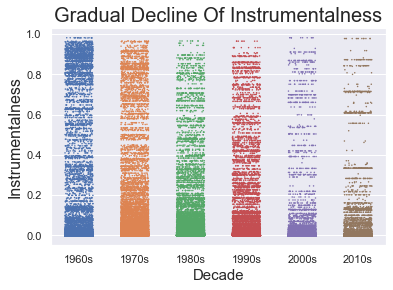

<Figure size 720x720 with 0 Axes>

In [58]:
#Strip plot for Instrumentalness to show how it has gradually decreased over time.....
sns.stripplot(data=bb_all_dec_feat, x='Decade', y='instrumentalness', jitter=0.25, size=1.5)
plt.title('Gradual Decline Of Instrumentalness', fontsize=20)
plt.ylabel('Instrumentalness', fontsize=16)
plt.xlabel('Decade', fontsize=15)
plt.figure(figsize=(10,10));

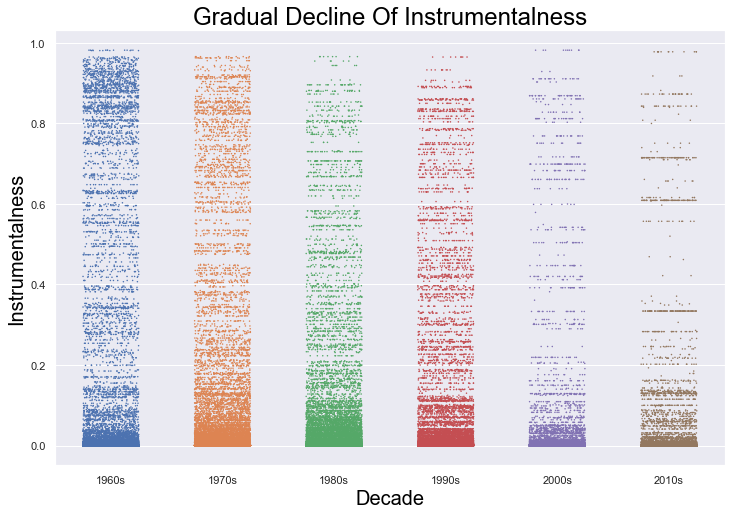

In [70]:
#Strip plot for Instrumentalness to show how it has gradually decreased over time.....

sns.stripplot(data=bb_all_dec_feat, x='Decade', y='instrumentalness', jitter=0.25, size=1.5)
plt.title('Gradual Decline Of Instrumentalness', fontsize=24, color='black')
plt.ylabel('Instrumentalness', fontsize=20, color='black')
plt.xlabel('Decade', fontsize=20, color='black')
sns.set(rc = {'figure.figsize':(12,8)})
plt.savefig('Instrumental_Decline.png');

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

...

df.plot(x='date', y='GVA', legend=True, color='g', ax=ax)

...


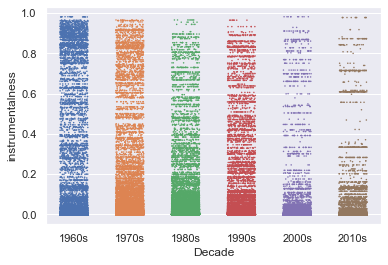

In [16]:
#Remvoing Nan does not make difference....
sns.stripplot(data=bb_all_dec_feat.dropna(subset=['instrumentalness']), x='Decade', y='instrumentalness', jitter=0.25, size=1.5);

In [17]:
bb_all_dec_feat.count()

url                          315456
WeekID                       315456
Week Position                315456
Song_x                       315456
Performer_x                  315456
SongID                       315456
Instance                     315456
Previous Week Position       285467
Peak Position                315456
Weeks on Chart               315456
Decade                       315456
Performer_y                  315420
Song_y                       315420
spotify_genre                304393
spotify_track_id             276619
spotify_track_preview_url    163669
spotify_track_duration_ms    276619
spotify_track_explicit       276619
spotify_track_album          276557
danceability                 276097
energy                       276097
key                          276097
loudness                     276097
mode                         276097
speechiness                  276097
acousticness                 276097
instrumentalness             276097
liveness                    

In [21]:
no_song_dup = bb_all_dec_feat.drop_duplicates(subset='SongID')
no_song_dup

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Decade,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,http://www.billboard.com/charts/hot-100/1965-07-17,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
8,http://www.billboard.com/charts/hot-100/1960-01-02,1960-01-02,68,Crazy Arms,Bob Beckham,Crazy ArmsBob Beckham,1,NaN,68,1,1960s,Bob Beckham,Crazy Arms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,http://www.billboard.com/charts/hot-100/1960-02-20,1960-02-20,68,O Dio Mio,Annette,O Dio MioAnnette,1,NaN,68,1,1960s,Annette,O Dio Mio,"['latin christian', 'mariachi cristiano']",6kFmfcqpy1ok5wfls2yCtZ,NaN,171426.0,0.0,Italiannette,0.378,0.439,5.0,-7.935,1.0,0.0303,0.2370,0.000008,0.0980,0.422,115.626,4.0,11.0
10,http://www.billboard.com/charts/hot-100/1960-08-20,1960-08-20,68,Delia Gone,Pat Boone,Delia GonePat Boone,1,NaN,68,1,1960s,Pat Boone,Delia Gone,"['adult standards', 'brill building pop', 'easy listening', 'lounge', 'rock-and-roll', 'rockabilly']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,http://www.billboard.com/charts/hot-100/1961-11-18,1961-11-18,68,Peppermint Twist - Part I,Joey Dee & the Starliters,Peppermint Twist - Part IJoey Dee & the Starliters,1,NaN,68,1,1960s,Joey Dee & the Starliters,Peppermint Twist - Part I,['australian talent show'],3RW8ZidI0OE9BnzZeNoNQv,https://p.scdn.co/mp3-preview/ec534a2d4b6dbff7b3a2c5279865072a40d09469?cid=b8d3901151d34489a160e3cf0ab1fa94,259266.0,0.0,Doin' the Twist at the Peppermint Lounge. Recorded Live,0.326,0.816,8.0,-14.825,1.0,0.0527,0.8810,0.326000,0.1850,0.826,147.213,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306453,http://www.billboard.com/charts/hot-100/2011-12-24,2011-12-24,91,You Gonna Fly,Keith Urban,You Gonna FlyKeith Urban,1,NaN,91,1,2010s,Keith Urban,You Gonna Fly,"['australian country', 'contemporary country', 'country', 'country road']",5B25Jpgu62IX8w1YtLibuA,NaN,216866.0,0.0,Get Closer (Deluxe Version),0.457,0.846,4.0,-8.547,1.0,0.0477,0.0598,0.000000,0.3400,0.851,177.353,4.0,43.0
306471,http://www.billboard.com/charts/hot-100/2015-04-11,2015-04-11,99,You Know You Like It,DJ Snake & AlunaGeorge,You Know You Like ItDJ Snake & AlunaGeorge,1,NaN,99,1,2010s,DJ Snake & AlunaGeorge,You Know You Like It,['electronic trap'],57kR5SniQIbsbVoIjjOUDa,NaN,247266.0,0.0,You Know You Like It,0.426,0.722,5.0,-5.369,0.0,0.1960,0.0113,0.000001,0.2620,0.250,196.133,4.0,71.0
306492,http://www.billboard.com/charts/hot-100/2011-03-19,2011-03-19,80,You Lie,The Band Perry,You LieThe Band Perry,1,NaN,80,1,2010s,The Band Perry,You Lie,"['contemporary country', 'country', 'country dawn', 'country road', 'modern country rock']",462tT5pBVstoLcOSJsBBKw,NaN,214733.0,0.0,The Band Perry,0.521,0.656,6.0,-5.015,1.0,0.0289,0.3870,0.000000,0.1430,0.598,170.939,4.0,50.0
307650,https://www.billboard.com/charts/hot-100/2019-01-05,2019-01-05,45,Run Rudolph Run,Chuck Berry,Run Rudolph RunChuck Berry,2,NaN,45,4,2010s,Chuck Berry,Run Rudolph Run,"['blues rock', 'classic rock', 'rock', 'rock-and-roll', 'rockabilly', 'soul']",2pnPe4pJtq7689i5ydzvJJ,NaN,165733.0,0.0,Rock 'N' Roll Rarities,0.688,0.711,7.0,-10.453,0.0,0.0832,0.7880,0.000026,0.0683,0.935,152.277,4.0,85.0


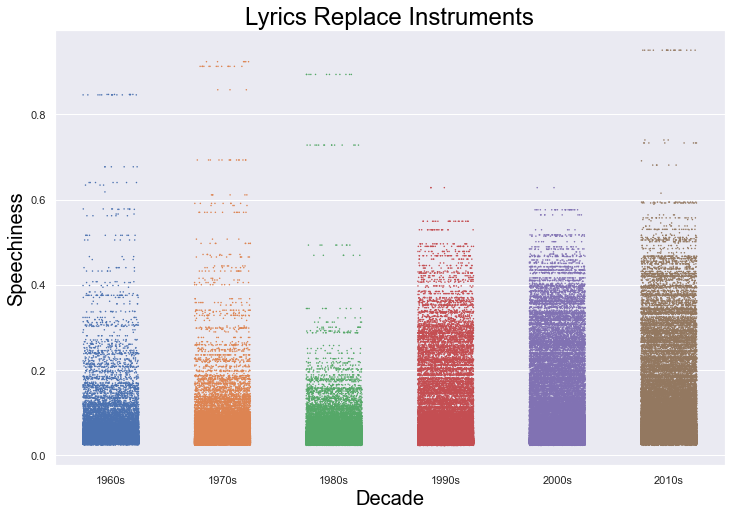

In [72]:
#Instrumentalness is replaced by "Speechiness" ever so gradually over time.....
sns.stripplot(data=bb_all_dec_feat, x='Decade', y='speechiness', jitter=0.25, size=1.5);
plt.title('Lyrics Replace Instruments', fontsize=24, color='black')
plt.ylabel('Speechiness', fontsize=20, color='black')
plt.xlabel('Decade', fontsize=20, color='black')
sns.set(rc = {'figure.figsize':(12,8)})
plt.savefig('Speechiness_Incline.png');

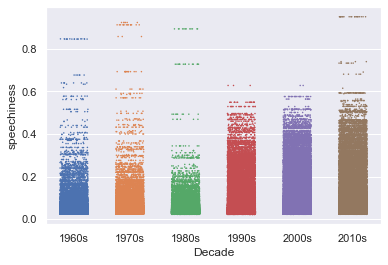

In [100]:
sns.stripplot(data=bb_all_dec_feat.dropna(subset=['speechiness']), x='Decade', y='speechiness', jitter=0.25, size=1.5);

In [ ]:
##Good idea to go to WordCloud for 80s vs 90s at this point.....guitar to mike shape? 

In [ ]:
#Top 10 speechy performers by decade does not illustrate clear winner.....

In [158]:
speechy = bb_all_dec_feat[['Performer_x','speechiness']].dropna().groupby('Performer_x').mean().sort_values(by='speechiness', ascending=False).reset_index()

In [159]:
speechy[speechy['Performer_x']=='Ed Sheeran']

,Performer_x,speechiness
3581,Ed Sheeran,0.052752


In [168]:
speechy_top10 = speechy.head(10)
speechy_top10 

,Performer_x,speechiness
0,Chris Young Duet With Cassadee Pope,0.951000
1,Hudson and Landry,0.916300
2,Charlie Drake,0.846000
3,Steve Martin,0.763714
4,Bob & Doug McKenzie,0.728000
5,D'Angelo Featuring Method Man And Redman,0.628000
6,Wink Martindale,0.618000
7,YG Featuring Drake & Kamaiyah,0.594000
8,"Nicki Minaj Featuring Drake, Lil Wayne & Chris Brown",0.592000
9,Lil Baby Featuring Meek Mill,0.589000


In [169]:
speechy_top10_dec = pd.merge(speechy_top10, bb_all_dec_feat, on='Performer_x', how='left').drop_duplicates(subset='Performer_x')

In [173]:
speechy_top10_dec[['Performer_x', 'speechiness_x', 'Decade']]

,Performer_x,speechiness_x,Decade
0,Chris Young Duet With Cassadee Pope,0.951000,2010s
20,Hudson and Landry,0.916300,1970s
40,Charlie Drake,0.846000,1960s
52,Steve Martin,0.763714,1970s
59,Bob & Doug McKenzie,0.728000,1980s
73,D'Angelo Featuring Method Man And Redman,0.628000,1990s
78,Wink Martindale,0.618000,1960s
81,YG Featuring Drake & Kamaiyah,0.594000,2010s
99,"Nicki Minaj Featuring Drake, Lil Wayne & Chris Brown",0.592000,2010s
124,Lil Baby Featuring Meek Mill,0.589000,2010s


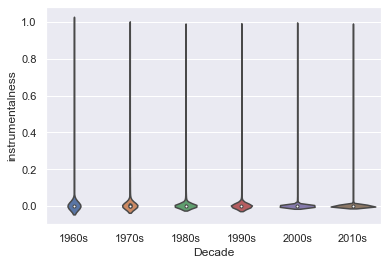

In [180]:
sns.violinplot(x='Decade', y='instrumentalness', data=bb_all_dec_feat);

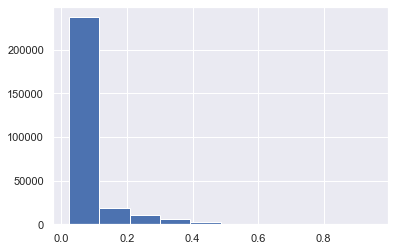

In [181]:
bb_all_dec_feat.speechiness.hist();

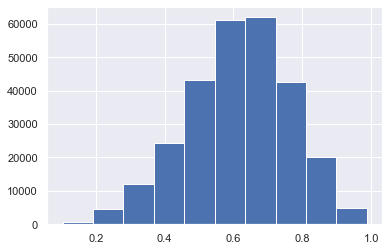

In [50]:
bb_all_dec_feat.danceability.hist();

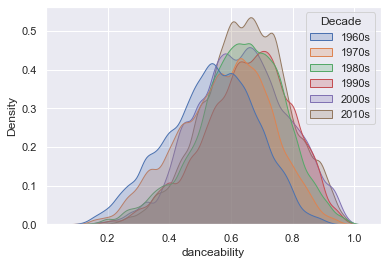

In [190]:
sns.kdeplot(data=bb_all_dec_feat, x='danceability', hue='Decade', fill=True);

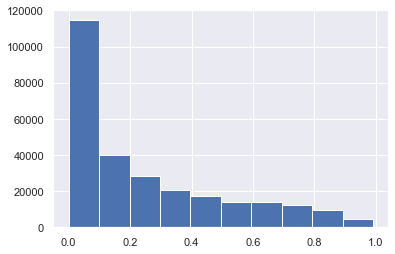

In [52]:
bb_all_dec_feat.acousticness.hist();

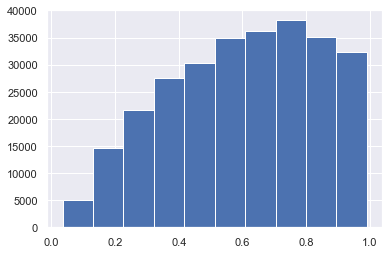

In [54]:
bb_all_dec_feat.valence.hist();

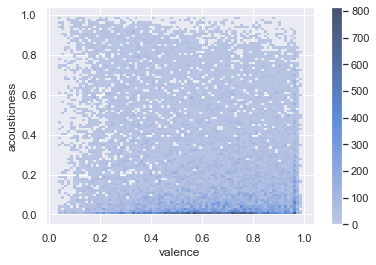

In [56]:
sns.histplot(data=bb_all_dec_feat, x='valence', y='acousticness', cbar=True);

In [ ]:
df = pd.read_clipboard()
ax = sns.histplot(data=df, x="Event Type", y="Location", cbar=True)

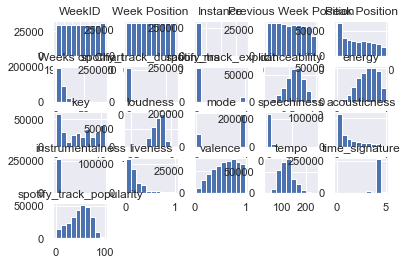

In [43]:
bb_all_dec_feat.hist();

In [191]:
bb_all_dec_feat

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Decade,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,http://www.billboard.com/charts/hot-100/1965-07-17,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.100,0.568,82.331,3.0,21.0
1,http://www.billboard.com/charts/hot-100/1965-07-24,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.100,0.568,82.331,3.0,21.0
2,http://www.billboard.com/charts/hot-100/1965-07-31,1965-07-31,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.100,0.568,82.331,3.0,21.0
3,http://www.billboard.com/charts/hot-100/1965-08-07,1965-08-07,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.100,0.568,82.331,3.0,21.0
4,http://www.billboard.com/charts/hot-100/1965-08-14,1965-08-14,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.100,0.568,82.331,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,http://www.billboard.com/charts/hot-100/2011-08-20,2011-08-20,21,Knee Deep,Zac Brown Band Featuring Jimmy Buffett,Knee DeepZac Brown Band Featuring Jimmy Buffett,1,19.0,18,13,2010s,Zac Brown Band Featuring Jimmy Buffett,Knee Deep,"['contemporary country', 'country', 'country road', 'modern country rock']",1yEwEiTpsaPhQi9lb5EVV4,https://p.scdn.co/mp3-preview/f6e8c491a6b3c9fe1de5fb1aefa7f1c3c297cfab?cid=b8d3901151d34489a160e3cf0ab1fa94,203173.0,0.0,You Get What You Give (Deluxe),0.715,0.584,8.0,-8.231,1.0,0.0296,0.4320,0.000001,0.095,0.610,90.987,4.0,70.0
315452,http://www.billboard.com/charts/hot-100/2017-10-14,2017-10-14,21,Mi Gente,J Balvin & Willy William Featuring Beyonce,Mi GenteJ Balvin & Willy William Featuring Beyonce,1,19.0,19,13,2010s,J Balvin & Willy William Featuring Beyonce,Mi Gente,"['latin', 'reggaeton']",4ipnJyDU3Lq15qBAYNqlqK,NaN,189440.0,0.0,Mi Gente,0.774,0.687,11.0,-4.818,0.0,0.0584,0.0179,0.000012,0.128,0.308,104.959,4.0,74.0
315453,http://www.billboard.com/charts/hot-100/2010-05-15,2010-05-15,21,I Made It (Cash Money Heroes),"Kevin Rudolf Featuring Birdman, Jay Sean, & Lil Wayne","I Made It (Cash Money Heroes)Kevin Rudolf Featuring Birdman, Jay Sean, & Lil Wayne",1,23.0,21,13,2010s,"Kevin Rudolf Featuring Birdman, Jay Sean, & Lil Wayne",I Made It (Cash Money Heroes),"['dance pop', 'pop rap']",6H2wnX7ytNeCKERIVqCwgs,NaN,249546.0,1.0,To The Sky,0.400,0.944,7.0,-2.902,1.0,0.1840,0.0481,0.000000,0.345,0.574,124.224,5.0,55.0
315454,https://www.billboard.com/charts/hot-100/2018-05-19,2